In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:59<00:00, 19.8MB/s]
100% 1.06G/1.06G [00:59<00:00, 19.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,AveragePooling2D,BatchNormalization

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image=tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [7]:
model = Sequential()


model.add(Conv2D(32,kernel_size=(3, 3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))

model.add(Conv2D(64,kernel_size=(3, 3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))

model.add(Conv2D(128, kernel_size=(3, 3),padding='valid',strides=2,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # Dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # 10 output classes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,788,481 (14.45 MB)

 Trainable params: 3,788,289 (14.45 MB)

 Non-trainable params: 192 (768.00 B)

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.5919 - loss: 0.9499 - val_accuracy: 0.7242 - val_loss: 0.5927
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 75ms/step - accuracy: 0.7274 - loss: 0.5418 - val_accuracy: 0.7608 - val_loss: 0.5137
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.7812 - loss: 0.4572 - val_accuracy: 0.7614 - val_loss: 0.5064
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.8179 - loss: 0.3912 - val_accuracy: 0.7748 - val_loss: 0.4902
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.8484 - loss: 0.3344 - val_accuracy: 0.7844 - val_loss: 0.4694
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.8686 - loss: 0.2794 - val_accuracy: 0.7210 - val_loss: 0.5099
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8868 - loss: 0.2450 - val_accuracy: 0.7894 - val_loss: 0.5597
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 46s 73ms/step - accuracy: 0.9025 - loss: 0.2093 - 

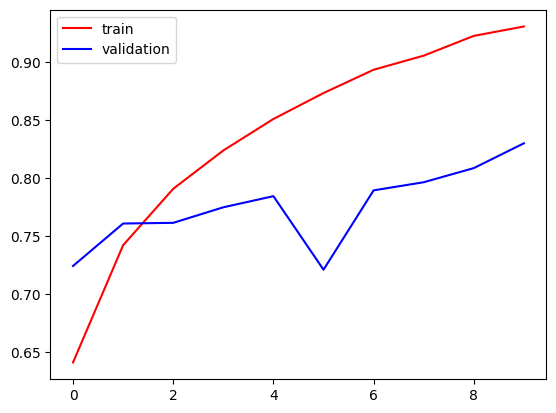

In [11]:
plt .plot(history.history['accuracy'],color='red',label='train')
plt .plot(history.history['val_accuracy'],color='blue',label='validation')
plt .legend()
plt.show()

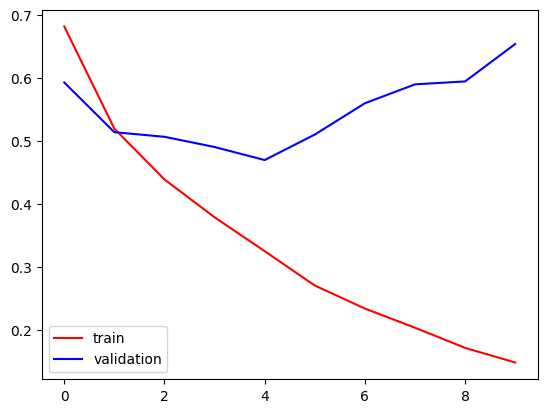

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

#Prediction on unseen data

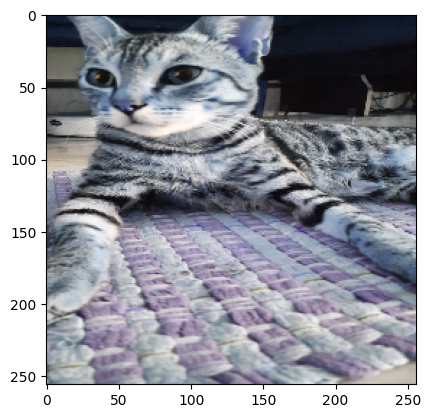

In [15]:
import cv2
test_img=cv2.imread('/content/cat.jfif')
test_img=cv2.resize(test_img,(256,256))
test_img=test_img/255
plt.imshow(test_img)

In [17]:
test_input=test_img.reshape(1,256,256,3)
prediction=model.predict(test_input)
predictions=prediction.argmax(axis=1)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0]


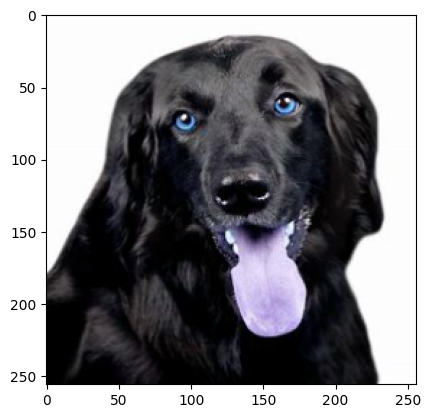

In [20]:
import cv2
test_img=cv2.imread('/content/dog2.jfif')
test_img=cv2.resize(test_img,(256,256))
test_img=test_img/255
plt.imshow(test_img)

In [21]:
test_input=test_img.reshape(1,256,256,3)
prediction=model.predict(test_input)
predictions=prediction.argmax(axis=1)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0]
